<a href="https://colab.research.google.com/github/KOSHALESHMEHER/Digit_Recognition_FCNN_Batch_Normalisation/blob/master/Hand_Written_Digit_Recog_FNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import matplotlib.pyplot as plt
import numpy as np

import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.optim as optim

In [0]:
trainset = torchvision.datasets.MNIST(root='./data', train=True, 
                                        download=True, 
                                        transform=transforms.ToTensor())
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

In [0]:
batch_size = 4

In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

In [0]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)

print(images[0].shape)
print(labels[0].item())

torch.Size([4, 1, 28, 28])
torch.Size([1, 28, 28])
0


In [0]:
def imshow(img, title):
    
    plt.figure(figsize=(batch_size * 4, 4))
    plt.axis('off')
    plt.imshow(np.transpose(img, (1, 2, 0)))
    plt.title(title)
    plt.show()

In [0]:
def show_batch_images(dataloader):
    images, labels = next(iter(dataloader))
    
    img = torchvision.utils.make_grid(images)
    imshow(img, title=[str(x.item()) for x in labels])
    
    return images, labels

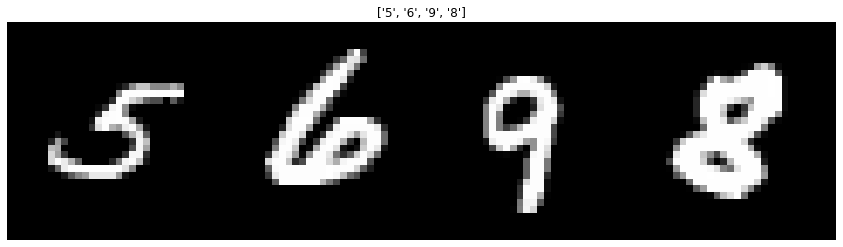

In [0]:
images, labels = show_batch_images(trainloader)

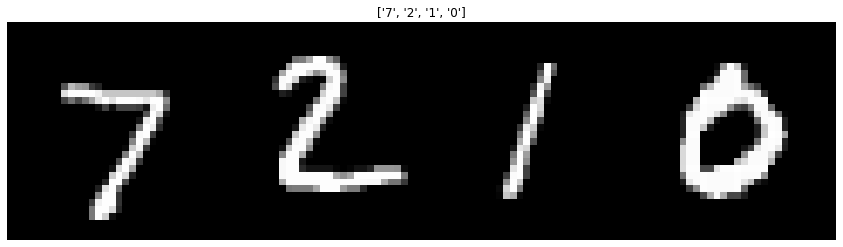

In [0]:
images, labels = show_batch_images(testloader)

In [0]:
class MyNet(nn.Module):
    def __init__(self): 
        super(MyNet, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(784, 48),  # 28 x 28 = 784
            nn.ReLU(),
            nn.Linear(48, 24),
            nn.ReLU(),
            nn.Linear(24, 10)
        )
             
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x
      

class MyNetBN(nn.Module):
    def __init__(self): 
        super(MyNetBN, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(784, 48),
            nn.BatchNorm1d(48),
            nn.ReLU(),
            nn.Linear(48, 24),
            nn.BatchNorm1d(24),
            nn.ReLU(),
            nn.Linear(24, 10)
        )
             
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x
    

In [0]:
model = MyNet()
model_bn = MyNetBN()

In [0]:
batch_size = 512

In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

## **CPU Execution**

In [0]:
device = torch.device("cpu")
print(device)

cpu


In [0]:
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(model.parameters(), lr=0.01)
opt_bn = optim.SGD(model_bn.parameters(), lr=0.01)

In [0]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        outputs = model(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [0]:
def evaluation_bn(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        outputs = model_bn(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

Epoch: 0/10 --->    Test acc (n,bn): 23.89 , 77.94     &     Train  acc (n,bn): 23.55 , 76.89 
Epoch: 1/10 --->    Test acc (n,bn): 30.88 , 86.02     &     Train  acc (n,bn): 30.02 , 85.35 
Epoch: 2/10 --->    Test acc (n,bn): 36.05 , 89.87     &     Train  acc (n,bn): 35.68 , 89.33 
Epoch: 3/10 --->    Test acc (n,bn): 48.10 , 91.45     &     Train  acc (n,bn): 46.45 , 91.03 
Epoch: 4/10 --->    Test acc (n,bn): 56.23 , 92.33     &     Train  acc (n,bn): 55.46 , 92.10 
Epoch: 5/10 --->    Test acc (n,bn): 62.55 , 92.95     &     Train  acc (n,bn): 62.31 , 92.89 
Epoch: 6/10 --->    Test acc (n,bn): 68.95 , 93.56     &     Train  acc (n,bn): 68.88 , 93.44 
Epoch: 7/10 --->    Test acc (n,bn): 74.40 , 93.82     &     Train  acc (n,bn): 73.82 , 93.95 
Epoch: 8/10 --->    Test acc (n,bn): 77.71 , 94.22     &     Train  acc (n,bn): 77.15 , 94.29 
Epoch: 9/10 --->    Test acc (n,bn): 79.99 , 94.56     &     Train  acc (n,bn): 79.39 , 94.72 


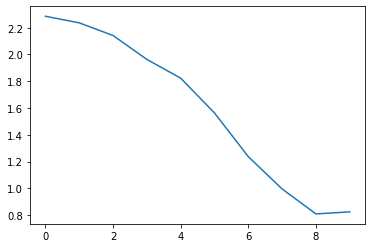

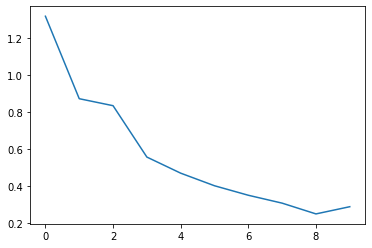

CPU times: user 3min 50s, sys: 455 ms, total: 3min 50s
Wall time: 3min 51s


In [0]:
%%time
loss_epoch_model_arr = []
loss_epoch_model_bn_arr = []
max_epochs = 10

for epoch in range(max_epochs):
  
    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        
        # train model
        opt.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        # train model_bn
        opt_bn.zero_grad()
        outputs_bn = model_bn(inputs)
        loss_bn = loss_fn(outputs_bn, labels)
        loss_bn.backward()
        opt_bn.step()
        
    loss_epoch_model_arr.append(loss.item())
    loss_epoch_model_bn_arr.append(loss_bn.item())
      
    print('Epoch: %d/%d --->    Test acc (n,bn): %0.2f , %0.2f     &     Train  acc (n,bn): %0.2f , %0.2f ' % (epoch, max_epochs, evaluation(testloader),evaluation_bn(testloader), evaluation(trainloader), evaluation_bn(trainloader)))
    

plt.plot(loss_epoch_model_arr)
plt.show()
plt.plot(loss_epoch_model_bn_arr)
plt.show()

# **GPU Execution**

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [0]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [0]:
def evaluation_bn(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_bn(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [0]:
model = MyNet().to(device)
model_bn = MyNetBN().to(device)

In [0]:
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(model.parameters())
opt_bn = optim.Adam(model_bn.parameters())

Epoch: 0/10, Test acc: 88.70 , 93.18      Train  acc: 88.03 , 92.62 
Epoch: 1/10, Test acc: 91.57 , 95.13      Train  acc: 91.52 , 95.24 
Epoch: 2/10, Test acc: 92.95 , 95.91      Train  acc: 92.93 , 96.68 
Epoch: 3/10, Test acc: 93.67 , 96.64      Train  acc: 93.77 , 97.37 
Epoch: 4/10, Test acc: 94.11 , 96.92      Train  acc: 94.33 , 98.02 
Epoch: 5/10, Test acc: 94.57 , 96.97      Train  acc: 94.88 , 98.22 
Epoch: 6/10, Test acc: 94.81 , 97.06      Train  acc: 95.17 , 98.58 
Epoch: 7/10, Test acc: 95.19 , 97.11      Train  acc: 95.61 , 98.83 
Epoch: 8/10, Test acc: 95.43 , 97.25      Train  acc: 95.98 , 99.04 
Epoch: 9/10, Test acc: 95.43 , 97.19      Train  acc: 96.02 , 99.14 


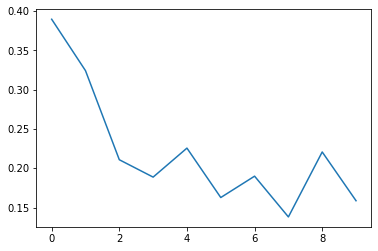

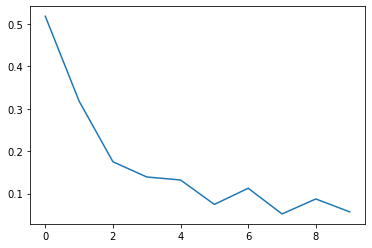

CPU times: user 3min 49s, sys: 665 ms, total: 3min 50s
Wall time: 3min 50s


In [0]:
%%time

loss_epoch_model_arr = []
loss_epoch_model_bn_arr = []

max_epochs = 10

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # train model
        opt.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        # train model
        opt_bn.zero_grad()
        outputs_bn = model_bn(inputs)
        loss_bn = loss_fn(outputs_bn, labels)
        loss_bn.backward()
        opt_bn.step()
        
    loss_epoch_model_arr.append(loss.item())
    loss_epoch_model_bn_arr.append(loss_bn.item())
      
    print('Epoch: %d/%d, Test acc: %0.2f , %0.2f      Train  acc: %0.2f , %0.2f ' % (epoch, max_epochs, evaluation(testloader),evaluation_bn(testloader), evaluation(trainloader), evaluation_bn(trainloader)))
    

plt.plot(loss_epoch_model_arr)
plt.show()
plt.plot(loss_epoch_model_bn_arr)
plt.show()    
    